In [419]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv


# **Import**

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# **1. Data Import & Structure**

In [421]:
df = pd.read_csv('/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv')

* **work_year: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.**

* **job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.**

* **job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.**

* **salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.**
 
* **salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.**

* **salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.**

* **employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.**
 
* **experience_level: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.**
 
* **employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.**
 
* **work_setting: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.**

* **company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.**

* **company_size: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.**

In [422]:
df.shape

(14199, 12)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [424]:
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


**Missing Value Check**

In [425]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [426]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


# **2. Data Transform**

In [427]:
df = df.rename(columns = {df.columns[0]: 'year',
                         df.columns[2]: 'type',
                         df.columns[3]: 'job',
                         df.columns[5]: 'currency',
                         df.columns[9]: 'location',
                         df.columns[11]: 'category'})

**Data check**

In [428]:
df.head()

,year,experience_level,type,job,salary,currency,salary_in_usd,employee_residence,work_setting,location,company_size,category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


# **3. Data Visualization**

In [429]:
num_cols = df.select_dtypes(include = ['int64']).columns
cat_cols = ['experience_level','type','work_setting','company_size']

**Histogram**

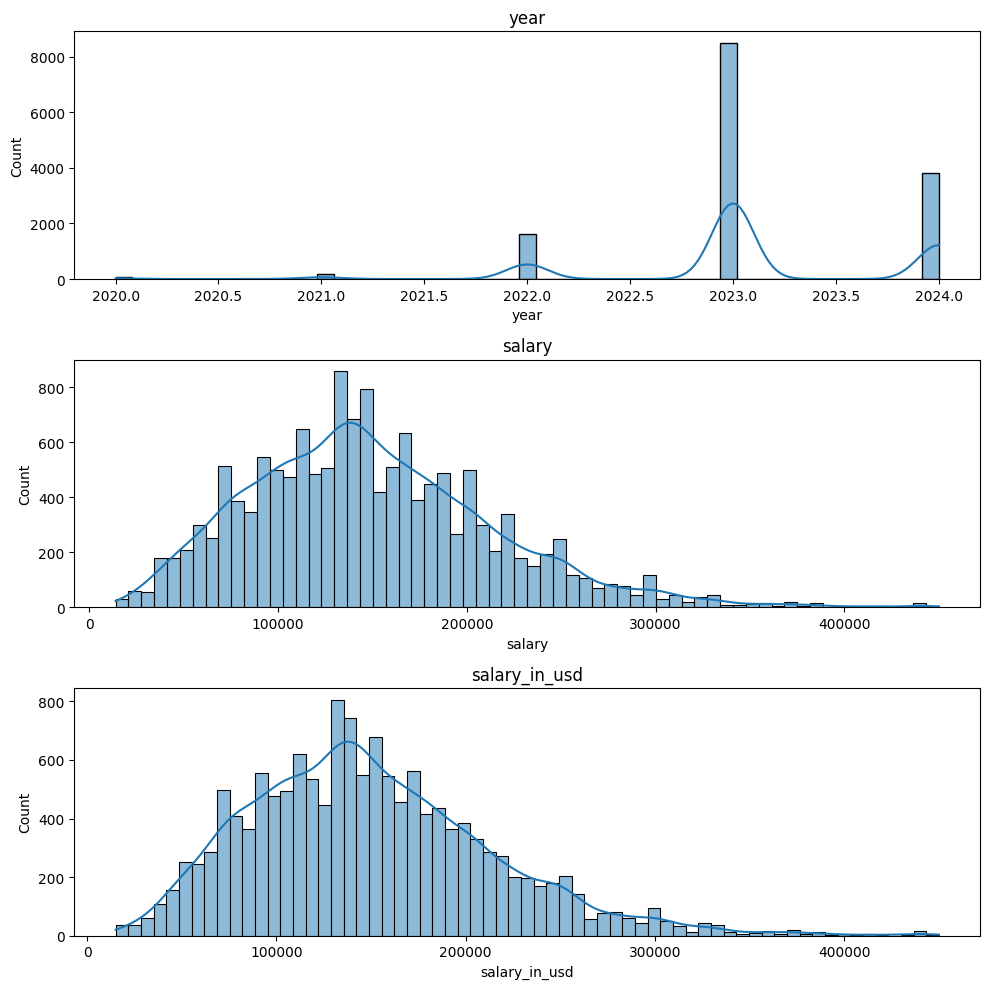

In [430]:
f, ax = plt.subplots(3,1, figsize=(10, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()   

**Counting by cat_cols**

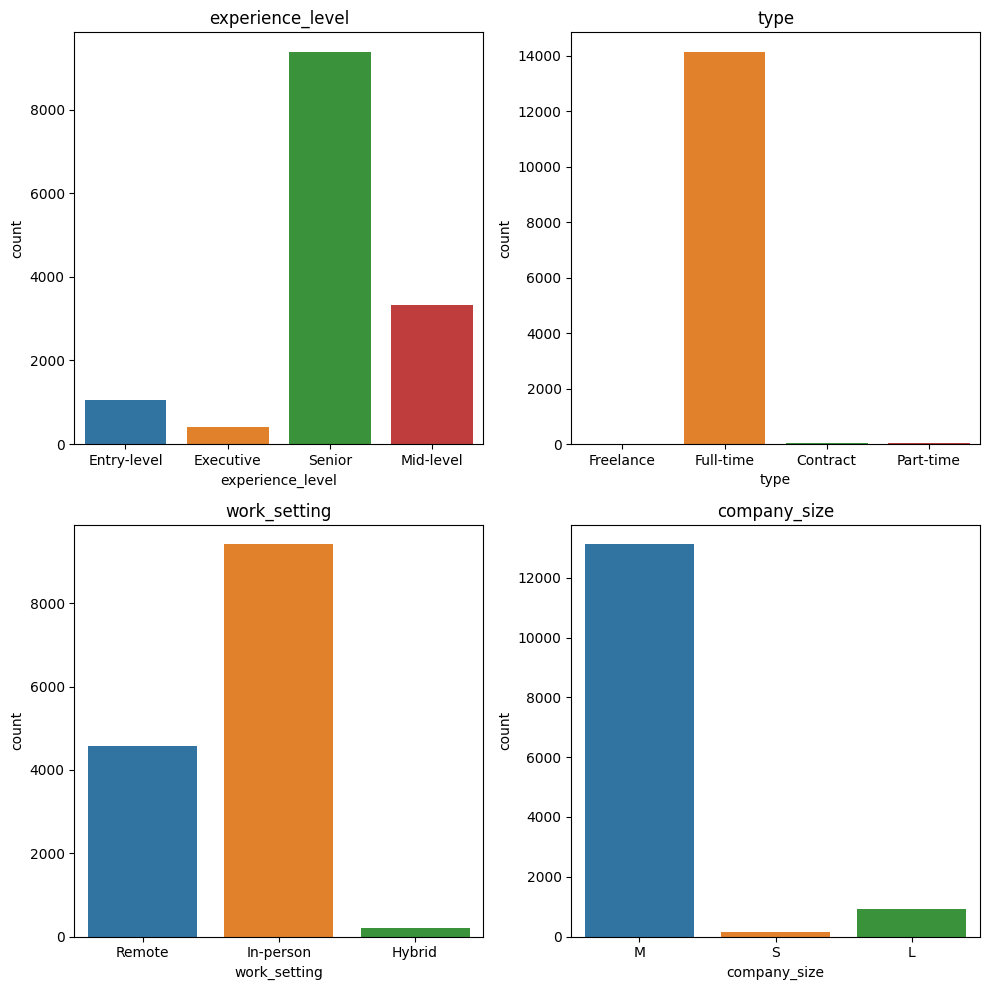

In [431]:
f, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
      

plt.tight_layout()
plt.show()   

-----------

**job category Top10**

In [432]:
top10_job_category = df.groupby(['job']).size().reset_index(name='count').sort_values(by='count',ascending=False)[1:12]

In [433]:
top10_job_category

,job,count
87,Data Scientist,2910
43,Data Analyst,2120
115,Machine Learning Engineer,1488
141,Research Scientist,454
11,Analytics Engineer,390
16,Applied Scientist,369
51,Data Architect,347
140,Research Engineer,264
31,Business Intelligence Engineer,218
78,Data Science,185


In [434]:
px.bar(top10_job_category, x = 'job', y = 'count', title='job category Top10', text_auto=True)

---------------

**employee_residence Top10**

In [435]:
top10_employee_residence = df.groupby(['employee_residence']).size().reset_index(name='count').sort_values(by='count',ascending=False)[1:11]

In [436]:
top10_employee_residence

,employee_residence,count
82,United Kingdom,616
12,Canada,371
73,Spain,131
29,Germany,90
27,France,63
5,Australia,48
63,Portugal,30
55,Netherlands,28
35,India,22
40,Italy,21


In [437]:
px.bar(top10_employee_residence, x = 'employee_residence', y = 'count', title='employee_residence Top10', text_auto=True)

-------------

**work category Top10**

In [438]:
top9_Work_category = df.groupby(['category']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [439]:
top9_Work_category

,category,count
7,Data Science and Research,4675
4,Data Engineering,3157
2,Data Analysis,2204
9,Machine Learning and AI,2148
8,Leadership and Management,791
0,BI and Visualization,600
3,Data Architecture and Modeling,419
5,Data Management and Strategy,115
6,Data Quality and Operations,79
1,Cloud and Database,11


In [440]:
px.bar(top9_Work_category, x = 'category', y = 'count', title='Category Top9', text_auto=True)

-------------

**Average salary by company size**

In [441]:
company_size_avg_salary = df.groupby('company_size')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)

In [442]:
company_size_avg_salary

,company_size,salary_in_usd
1,M,150636.567038
0,L,143806.397171
2,S,89576.690476


In [443]:
px.bar(company_size_avg_salary , x= 'company_size', y= 'salary_in_usd',title='Average salary by company size', text_auto=True)

-----------

**Average Salary Top10 by job**

In [444]:
avg_top10_job_category = df.groupby('job')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)[1:11]

In [445]:
avg_top10_job_category

,job,salary_in_usd
86,Data Science Tech Lead,375000.000000
105,Head of Machine Learning,337000.000000
126,Managing Director Data Science,280000.000000
9,AWS Data Architect,258000.000000
35,Cloud Data Architect,250000.000000
0,AI Architect,229721.130435
98,Director of Data Science,218775.333333
123,Machine Learning Software Engineer,212907.692308
48,Data Analytics Lead,208873.176471
103,Head of Data,208790.893617


In [446]:
px.bar(avg_top10_job_category, x= 'job', y= 'salary_in_usd',title='Average Salary by Top10', text_auto=True)

-------

**Average Salary Top9 by category**

In [447]:
avg_top9_Work_category = df.groupby('category')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)[1:10]

In [448]:
avg_top9_Work_category

,category,salary_in_usd
7,Data Science and Research,162471.364064
3,Data Architecture and Modeling,156159.405728
4,Data Engineering,146720.425721
1,Cloud and Database,142818.181818
8,Leadership and Management,142644.457649
0,BI and Visualization,125803.150000
2,Data Analysis,106742.485027
6,Data Quality and Operations,96294.367089
5,Data Management and Strategy,93533.686957


In [449]:
px.bar(avg_top9_Work_category, x= 'category', y= 'salary_in_usd',title='Average Salary Top9 by category', text_auto=True)

----------------

**Job Top 3 salary change**

In [450]:
year_salary_job = df.groupby(['year','job'])['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)

In [451]:
year_salary_job

,year,job,salary_in_usd
91,2022,Data Analytics Lead,405000.0
145,2023,Analytics Engineering Manager,399880.0
323,2024,Head of Machine Learning,376000.0
103,2022,Data Science Tech Lead,375000.0
11,2020,Director of Data Science,325000.0
...,...,...,...
60,2021,Machine Learning Research Engineer,20000.0
172,2023,Data Analyst Lead,18000.0
269,2024,Big Data Engineer,17600.0
15,2020,ML Engineer,15966.0


In [452]:
DataScientist = year_salary_job.loc[year_salary_job['job'] == 'Data Scientist', :].reset_index().sort_values(by='year', ascending=False)
DataAnalyst = year_salary_job.loc[year_salary_job['job'] == 'Data Analyst', :].reset_index().sort_values(by='year', ascending=False)
MachineLearningEngineer = year_salary_job.loc[year_salary_job['job'] == 'Machine Learning Engineer', :].reset_index().sort_values(by='year', ascending=False)

In [453]:
change_salary_job = pd.concat([DataScientist,DataAnalyst,MachineLearningEngineer])

In [454]:
fig = px.line(change_salary_job, x='year', y='salary_in_usd',
              title='Job Top 3 salary change', color= 'job')


fig.update_xaxes(ticks="outside", dtick=1)
fig.show()

-----------

**Change in salary for experience_level by year**

In [455]:
change_salary_lv = df.groupby(['experience_level','year'])['salary_in_usd'].mean().reset_index().sort_values(by='year', ascending=False)

In [456]:
change_salary_lv

,experience_level,year,salary_in_usd
19,Senior,2024,166041.634959
4,Entry-level,2024,97401.565820
9,Executive,2024,198529.811475
14,Mid-level,2024,133955.553586
3,Entry-level,2023,91928.613537
18,Senior,2023,165298.436361
8,Executive,2023,190552.579167
13,Mid-level,2023,123145.983510
2,Entry-level,2022,81981.955357
7,Executive,2022,191059.075000


In [457]:
fig = px.line(change_salary_lv, x='year', y= 'salary_in_usd',
              title='Change in salary for \'experience_level\' by year', color= 'experience_level')


fig.update_xaxes(ticks="outside", dtick=1)
fig.show()

---------

**Change in salary for 'type' by year**

In [458]:
change_employee_type = df.groupby(['type','year'])['salary_in_usd'].mean().reset_index().sort_values(by='year', ascending=False)

In [459]:
change_employee_type

,type,year,salary_in_usd
19,Part-time,2024,69266.571429
4,Contract,2024,98159.571429
9,Freelance,2024,30000.000000
14,Full-time,2024,149579.317439
3,Contract,2023,105682.666667
18,Part-time,2023,69820.000000
8,Freelance,2023,39250.000000
13,Full-time,2023,153751.609281
2,Contract,2022,69545.250000
7,Freelance,2022,83333.333333


In [460]:
fig = px.line(change_employee_type, x='year', y= 'salary_in_usd',
              title='Change in salary for \'type\' by year', color= 'type')


fig.update_xaxes(ticks="outside", dtick=1)
fig.show()

------------

**Correlation**

In [461]:
correlation_matrix = df[num_cols].corr()

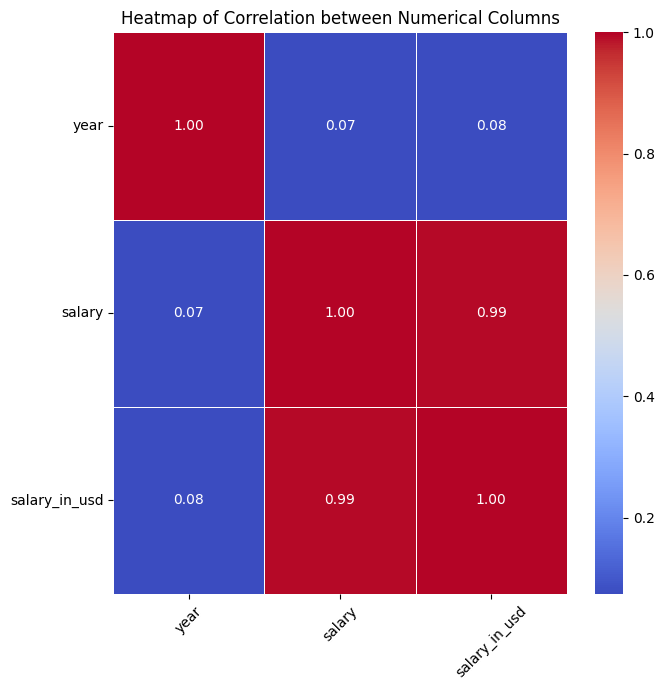

In [462]:
# Plot heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation between Numerical Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

--------------

**Please leave your advice in the comments. Thank you**